In [1]:
#Importing and reviewing the data
# Data handling
import pandas as pd

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
from matplotlib.ticker import MaxNLocator
import plotly.express as px

# EDA (pandas-profiling, etc. )
# Feature Processing (Scikit-learn processing, etc. )
from sklearn import preprocessing 

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.ensemble import RandomForestRegressor 
import lightgbm as lgb
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
from sklearn.model_selection import train_test_split
from itertools import product
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_log_error as msle
from statsmodels.graphics import tsaplots
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os
import missingno as msno

from matplotlib import rcParams
#styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

# use sklearn to import a dataset
from sklearn.datasets import load_wine

In [2]:
#Loading all datasets
df_holidays_events = pd.read_csv('store-sales-time-series-forecasting\holidays_events.csv', parse_dates=["date"])
df_oil = pd.read_csv('store-sales-time-series-forecasting\oil.csv', parse_dates=["date"])
df_stores = pd.read_csv('store-sales-time-series-forecasting\stores.csv')
df_test = pd.read_csv('store-sales-time-series-forecasting\\test.csv', index_col=["id"],parse_dates=["date"])
df_train = pd.read_csv('store-sales-time-series-forecasting\\train.csv', index_col=["id"],parse_dates=["date"])
df_transactions = pd.read_csv('store-sales-time-series-forecasting\\transactions.csv', parse_dates=["date"])

In [3]:
df_train

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


In [4]:
df_test

,date,store_nbr,family,onpromotion
id,,,,
3000888,2017-08-16,1,AUTOMOTIVE,0
3000889,2017-08-16,1,BABY CARE,0
3000890,2017-08-16,1,BEAUTY,2
3000891,2017-08-16,1,BEVERAGES,20
3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...
3029395,2017-08-31,9,POULTRY,1
3029396,2017-08-31,9,PREPARED FOODS,0
3029397,2017-08-31,9,PRODUCE,1


In [5]:
df_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [6]:
df_stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [7]:
df_transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [8]:
df_holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [9]:
df_train

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


## Q1. Is the train dataset complete (has all the required dates)?

In [10]:
# Convert the date columns to datetime format
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

# Get the date range in the train and test datasets
train_range = pd.date_range(df_train['date'].min(), df_train['date'].max())
test_range = pd.date_range(df_test['date'].min(), df_test['date'].max())

# Check if there are any missing dates in the train dataset
missing_dates = set(test_range) - set(train_range)
if missing_dates:
    print("Train dataset is incomplete. Missing dates:", missing_dates)
else:
    print("Train dataset is complete.")

Train dataset is incomplete. Missing dates: {Timestamp('2017-08-31 00:00:00', freq='D'), Timestamp('2017-08-18 00:00:00', freq='D'), Timestamp('2017-08-28 00:00:00', freq='D'), Timestamp('2017-08-21 00:00:00', freq='D'), Timestamp('2017-08-29 00:00:00', freq='D'), Timestamp('2017-08-26 00:00:00', freq='D'), Timestamp('2017-08-25 00:00:00', freq='D'), Timestamp('2017-08-30 00:00:00', freq='D'), Timestamp('2017-08-24 00:00:00', freq='D'), Timestamp('2017-08-19 00:00:00', freq='D'), Timestamp('2017-08-16 00:00:00', freq='D'), Timestamp('2017-08-22 00:00:00', freq='D'), Timestamp('2017-08-27 00:00:00', freq='D'), Timestamp('2017-08-17 00:00:00', freq='D'), Timestamp('2017-08-23 00:00:00', freq='D'), Timestamp('2017-08-20 00:00:00', freq='D')}


- The output above indicates that the dataset is incomplete because there are some dates missing.

- There are 16 missing dates in total, ranging from August 16th, 2017 to August 31st, 2017.

## Q2. Which dates have the lowest and highest sales for each year?

In [11]:
# Group the data by year and date, and calculate the total sales for each date
sales_by_date = df_train.groupby([df_train['date'].dt.year, df_train['date']])['sales'].sum()

# Find the dates with the lowest and highest sales for each year
for year in sales_by_date.index.levels[0]:
    sales_year = sales_by_date.loc[year]
    min_date = sales_year.idxmin().strftime('%Y-%m-%d')
    max_date = sales_year.idxmax().strftime('%Y-%m-%d')
    print(f"Year {year}: Lowest sales on {min_date}, Highest sales on {max_date}")

Year 2013: Lowest sales on 2013-01-01, Highest sales on 2013-12-23
Year 2014: Lowest sales on 2014-01-01, Highest sales on 2014-12-23
Year 2015: Lowest sales on 2015-01-01, Highest sales on 2015-10-04
Year 2016: Lowest sales on 2016-01-01, Highest sales on 2016-04-18
Year 2017: Lowest sales on 2017-01-01, Highest sales on 2017-04-01


Year 2013: Lowest sales on 2013-01-01 00:00:00, Highest sales on 2013-12-23 00:00:00
Year 2014: Lowest sales on 2014-01-01 00:00:00, Highest sales on 2014-12-23 00:00:00
Year 2015: Lowest sales on 2015-01-01 00:00:00, Highest sales on 2015-10-04 00:00:00
Year 2016: Lowest sales on 2016-01-01 00:00:00, Highest sales on 2016-04-18 00:00:00
Year 2017: Lowest sales on 2017-01-01 00:00:00, Highest sales on 2017-04-01 00:00:00


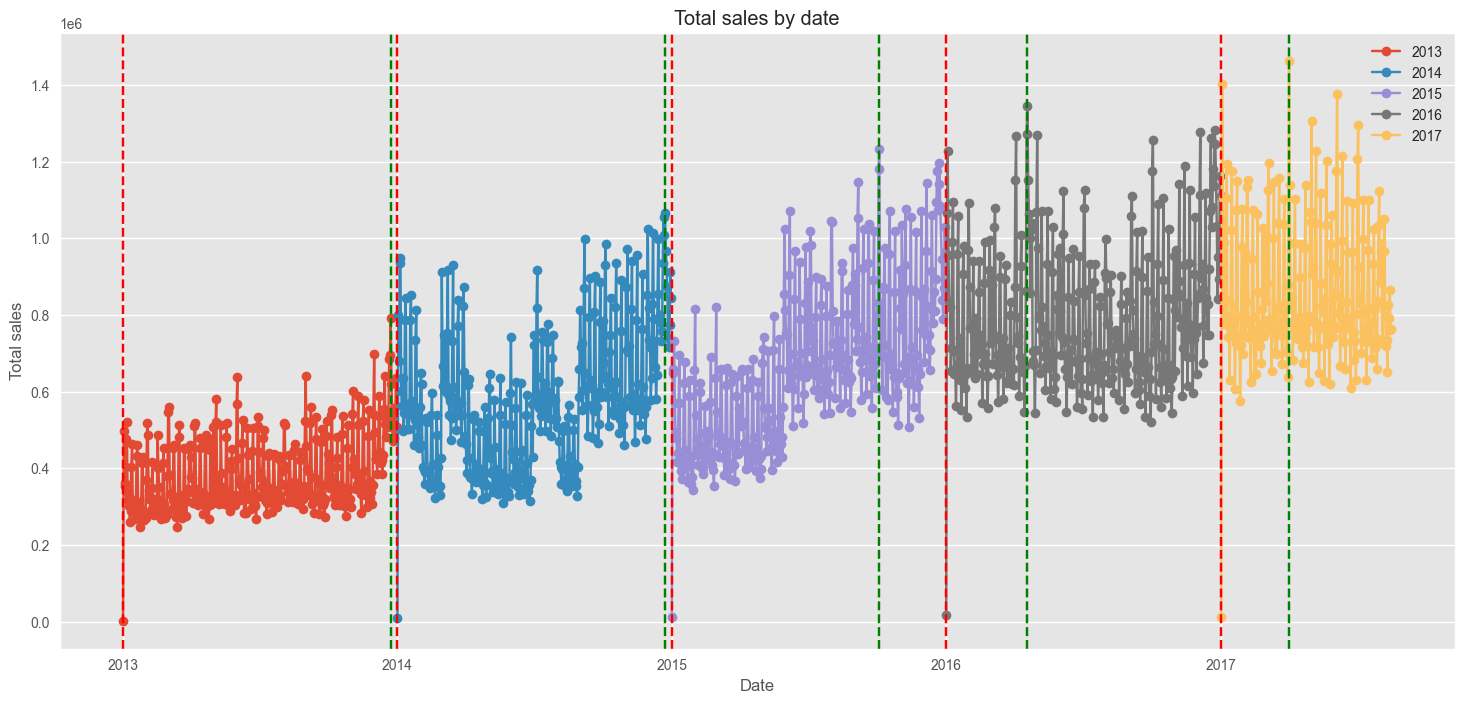

In [12]:
import matplotlib.dates as mdates

# Group the data by year and date, and calculate the total sales for each date
sales_by_date = df_train.groupby([df_train['date'].dt.year, df_train['date']])['sales'].sum()

# Find the dates with the lowest and highest sales for each year
fig, ax = plt.subplots(figsize=(18, 8))

for year in sales_by_date.index.levels[0]:
    sales_year = sales_by_date.loc[year]
    min_date = sales_year.idxmin()
    max_date = sales_year.idxmax()
    print(f"Year {year}: Lowest sales on {min_date}, Highest sales on {max_date}")
    
    # Plot the sales for each date in the year
    ax.plot(sales_year.index, sales_year.values, '-o', label=year)

    # Plot vertical lines for the dates with the lowest and highest sales
    ax.axvline(x=min_date, linestyle='--', color='red')
    ax.axvline(x=max_date, linestyle='--', color='green')

    # Convert date strings to numerical values
    min_date_num = mdates.date2num(min_date)
    max_date_num = mdates.date2num(max_date)

    # # Plot vertical lines for the dates with the lowest and highest sales
    # ax.axvline(x=min_date_num, linestyle='--', color='gray')
    # ax.axvline(x=max_date_num, linestyle='--', color='gray')

# Add legend and axis labels
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Total sales')
ax.set_title('Total sales by date')
plt.show()

The output above provides a summary of the lowest and highest sales for each year between 2013 and 2017. Each year is listed separately with its corresponding lowest and highest sales dates.

- For 2013, the lowest sales occurred on January 1st, 2013, while the highest sales occurred on December 23rd, 2013.

- For 2014, the lowest sales occurred on January 1st, 2014, while the highest sales occurred on December 23rd, 2014.

- For 2015, the lowest sales occurred on January 1st, 2015, while the highest sales occurred on October 4th, 2015.

- For 2016, the lowest sales occurred on January 1st, 2016, while the highest sales occurred on April 18th, 2016.

- For 2017, the lowest sales occurred on January 1st, 2017, while the highest sales occurred on April 1st, 2017.

## Q3. Did the earthquake impact sales?

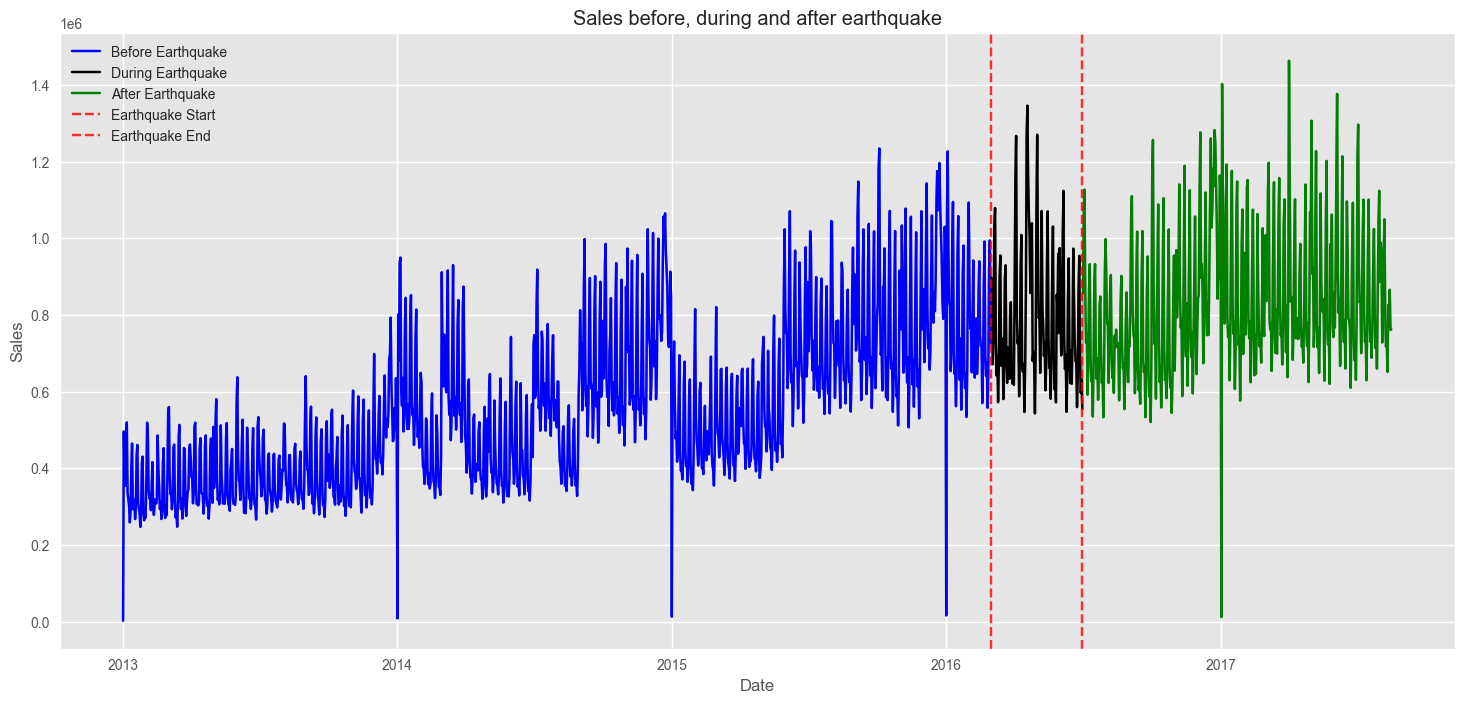

In [13]:
# data for the period around the earthquake
start_date = '2016-03-01'
end_date = '2016-06-30'

# convert date column to datetime format
df_train['date'] = pd.to_datetime(df_train['date'])

# Group the data by year and date, and calculate the total sales for each date
sales_by_date = df_train.groupby([df_train['date'].dt.year, df_train['date'].dt.date])['sales'].sum()

# plot sales data with vertical lines at start and end dates
fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(sales_by_date.index.get_level_values(1), sales_by_date.values, color='gray', alpha=0.6)

# highlight the period before the earthquake
sales_before = sales_by_date[sales_by_date.index.get_level_values(1) < pd.to_datetime(start_date)]
ax.plot(sales_before.index.get_level_values(1), sales_before.values, color='blue', label='Before Earthquake')

# highlight the period during the earthquake
sales_during = sales_by_date[(sales_by_date.index.get_level_values(1) >= pd.to_datetime(start_date)) & (sales_by_date.index.get_level_values(1) <= pd.to_datetime(end_date))]
ax.plot(sales_during.index.get_level_values(1), sales_during.values, color='black', label='During Earthquake')

# highlight the period after the earthquake
sales_after = sales_by_date[sales_by_date.index.get_level_values(1) > pd.to_datetime(end_date)]
ax.plot(sales_after.index.get_level_values(1), sales_after.values, color='green', label='After Earthquake')

ax.axvline(x=pd.to_datetime(start_date), color='red', linestyle='--', alpha=0.8, label='Earthquake Start')
ax.axvline(x=pd.to_datetime(end_date), color='red', linestyle='--', alpha=0.8, label='Earthquake End')

ax.set_title('Sales before, during and after earthquake')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.legend()
plt.show()

In [14]:
# filter data for the period around the earthquake
train_earthquake = df_train[(df_train['date'] >= start_date) & (df_train['date'] <= end_date)]
train_earthquake_stores = train_earthquake.merge(df_stores, on='store_nbr')

# calculate the total sales for stores in affected areas and non-affected areas
sales_affected = train_earthquake_stores[train_earthquake_stores['city'].isin(['Manta', 'Portoviejo', 'Chone'])]['sales'].sum()
sales_non_affected = train_earthquake_stores[~train_earthquake_stores['city'].isin(['Manta', 'Portoviejo', 'Chone'])]['sales'].sum()

# calculate the percentage change in sales
percent_change = (sales_affected - sales_non_affected) / sales_non_affected * 100

print(f'Sales in affected areas: {sales_affected:.2f}')
print(f'Sales in non-affected areas: {sales_non_affected:.2f}')
print(f'Percentage change: {percent_change:.2f}%')

Sales in affected areas: 1643017.34
Sales in non-affected areas: 94440439.49
Percentage change: -98.26%


- Total sales in affected areas is 1643017.34
- Total sales in non-affected areas is 94440439.49

## Q4. Are certain groups of stores selling more products? (Cluster, city, state, type)

In [15]:
# merge the train and stores data
train_stores = pd.merge(df_train, df_stores, on='store_nbr')

# group the data by different store metadata
sales_by_cluster = train_stores.groupby('cluster')['sales'].sum()
sales_by_city = train_stores.groupby('city')['sales'].sum()
sales_by_state = train_stores.groupby('state')['sales'].sum()
sales_by_type = train_stores.groupby('type')['sales'].sum()

# print the results
print('Total sales by cluster:\n', sales_by_cluster)
print('\nTotal sales by city:\n', sales_by_city)
print('\nTotal sales by state:\n', sales_by_state)
print('\nTotal sales by type:\n', sales_by_type)

Total sales by cluster:
 cluster
1     5.437675e+07
2     2.891640e+07
3     7.562870e+07
4     4.944344e+07
5     6.208755e+07
6     1.142544e+08
7     1.547812e+07
8     1.079282e+08
9     3.056108e+07
10    8.532443e+07
11    1.006143e+08
12    1.803097e+07
13    7.210225e+07
14    1.574305e+08
15    5.529695e+07
16    1.325938e+07
17    3.291149e+07
Name: sales, dtype: float64

Total sales by city:
 city
Ambato           4.030440e+07
Babahoyo         1.774687e+07
Cayambe          2.832556e+07
Cuenca           4.916860e+07
Daule            1.918802e+07
El Carmen        1.105748e+07
Esmeraldas       1.639169e+07
Guaranda         1.304951e+07
Guayaquil        1.229673e+08
Ibarra           1.145127e+07
Latacunga        2.118226e+07
Libertad         1.532243e+07
Loja             1.886000e+07
Machala          3.338680e+07
Manta            1.391234e+07
Playas           7.676679e+06
Puyo             4.090202e+06
Quevedo          1.417850e+07
Quito            5.567418e+08
Riobamba         1

- he first section shows the total sales by cluster. There are 17 clusters in the dataset, and their total sales range from 5.437675e+07 to 1.574305e+08.

- The second section shows the total sales by city. There are 23 cities in the dataset, and their total sales range from 4.090202e+06 to 5.567418e+08.

- The third section shows the total sales by state. There are 16 states in the dataset, and their total sales range from 1.138792e+07 to 5.850674e+08.

- The final section shows the total sales by type. There are 5 types in the dataset, and their total sales range from 5.982244e+07 to 3.510833e+08.

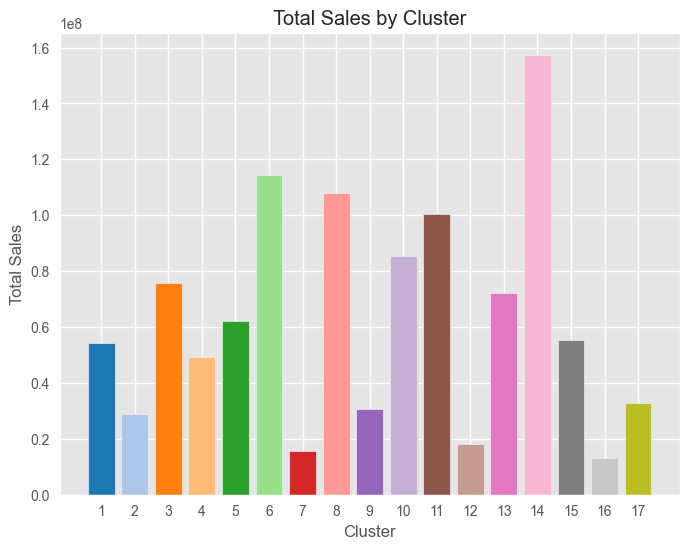

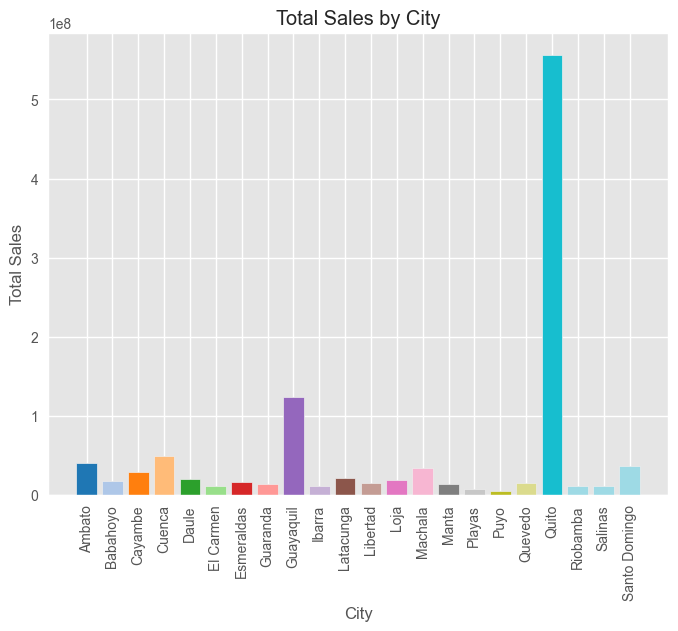

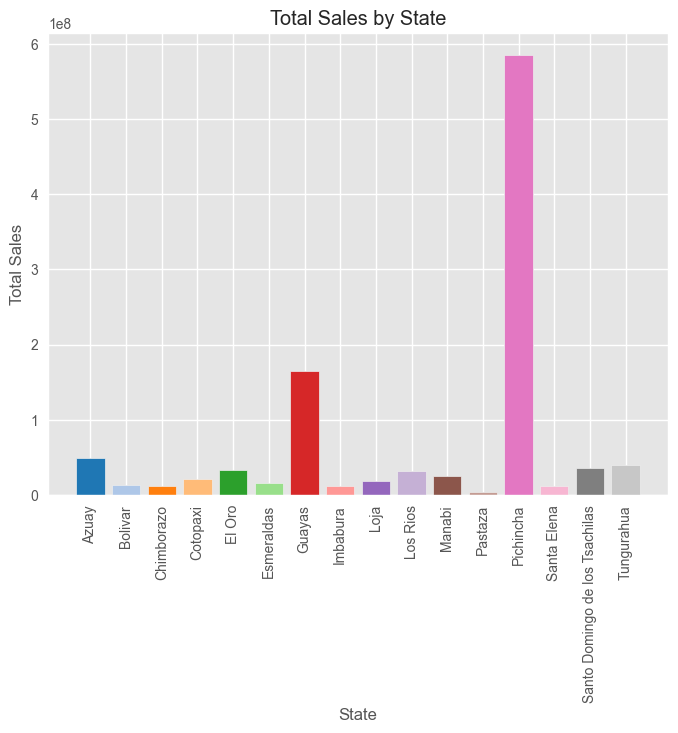

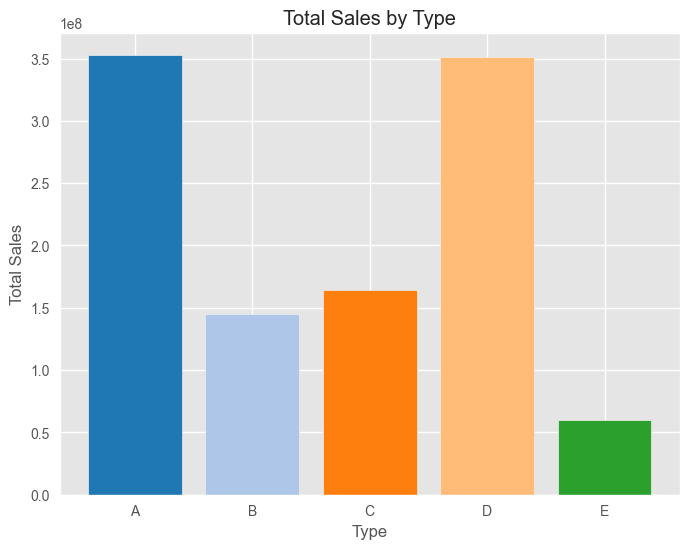

In [16]:
# define a colormap
cmap = plt.get_cmap('tab20')

# plot total sales by cluster
plt.figure(figsize=(8, 6))
plt.bar(sales_by_cluster.index, sales_by_cluster.values, color=cmap(range(len(sales_by_cluster))))
plt.title('Total Sales by Cluster')
plt.xlabel('Cluster')
plt.xticks(sales_by_cluster.index)
plt.ylabel('Total Sales')
plt.show()


# plot total sales by city
plt.figure(figsize=(8, 6))
plt.bar(sales_by_city.index, sales_by_city.values, color=cmap(range(len(sales_by_city))))
plt.title('Total Sales by City')
plt.xlabel('City')
plt.xticks(rotation=90) # add rotation to x-axis labels
plt.ylabel('Total Sales')
plt.show()

# plot total sales by state
plt.figure(figsize=(8, 6))
plt.bar(sales_by_state.index, sales_by_state.values, color=cmap(range(len(sales_by_state))))
plt.title('Total Sales by State')
plt.xlabel('State')
plt.xticks(rotation=90) # add rotation to x-axis labels
plt.ylabel('Total Sales')
plt.show()

# plot total sales by type
plt.figure(figsize=(8, 6))
plt.bar(sales_by_type.index, sales_by_type.values, color=cmap(range(len(sales_by_type))))
plt.title('Total Sales by Type')
plt.xlabel('Type')
#plt.xticks() # add rotation to x-axis labels
plt.ylabel('Total Sales')
plt.show()


## Q5. Are sales affected by promotions, oil prices and holidays?

In [17]:
# merge train data with transaction data
train_transactions_df = pd.merge(df_train, df_transactions, on=['date', 'store_nbr'], how='left')

# merge train_transactions data with oil data
train_transactions_oil_df = pd.merge(train_transactions_df, df_oil, on=['date'], how='left')

# merge train_transactions_oil data with holidays data
train_transactions_oil_holidays_df = pd.merge(train_transactions_oil_df, df_holidays_events, on=['date'], how='left')

# create a column to indicate if a day is a holiday or not
train_transactions_oil_holidays_df['is_holiday'] = train_transactions_oil_holidays_df['type'].apply(lambda x: 1 if x in ['Holiday', 'Bridge'] else 0)

# create a column to indicate if a day is a promotion day or not
train_transactions_oil_holidays_df['is_promotion'] = train_transactions_oil_holidays_df['onpromotion'].apply(lambda x: 1 if x == True else 0)

# calculate the total sales for regular days and holidays
regular_sales = train_transactions_oil_holidays_df[train_transactions_oil_holidays_df['is_holiday'] == 0]['sales'].sum()
holiday_sales = train_transactions_oil_holidays_df[train_transactions_oil_holidays_df['is_holiday'] == 1]['sales'].sum()

# calculate the total sales for promotion days and non-promotion days
promotion_sales = train_transactions_oil_holidays_df[train_transactions_oil_holidays_df['is_promotion'] == 1]['sales'].sum()
non_promotion_sales = train_transactions_oil_holidays_df[train_transactions_oil_holidays_df['is_promotion'] == 0]['sales'].sum()

# print the results
print("Sales during regular days: ", regular_sales)
print("Sales during holidays: ", holiday_sales)
print("Sales during promotion days: ", promotion_sales)
print("Sales during non-promotion days: ", non_promotion_sales)


Sales during regular days:  984963746.2185814
Sales during holidays:  111610997.98766968
Sales during promotion days:  83981703.24353021
Sales during non-promotion days:  1012593040.9627197


- during regular days: the total sales during days that are not holidays or promotion days is $984,963,746.22.
- during holidays: the total sales during holidays is $111,610,997.99.
- during promotion days: the total sales during promotion days is $83,981,703.24.
- during non-promotion days: the total sales during days that are not promotion days is $1,012,593,040.96.

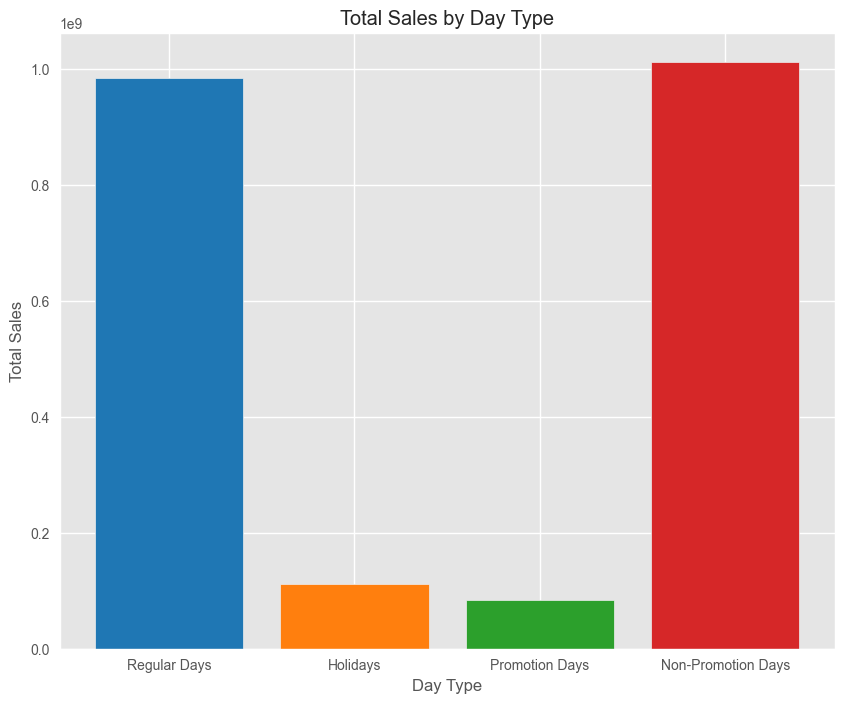

In [18]:
# create a dictionary with the sales data
sales_data = {'Regular Days': regular_sales, 'Holidays': holiday_sales,
              'Promotion Days': promotion_sales, 'Non-Promotion Days': non_promotion_sales}

# define a colormap
cmap = plt.get_cmap('tab10')

# plot the sales data
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(sales_data.keys(), sales_data.values(), color=cmap(range(len(sales_data))))
ax.set_title('Total Sales by Day Type')
ax.set_xlabel('Day Type')
ax.set_ylabel('Total Sales')
plt.show()


## Q6. What analysis can we get from the date and its extractable features?

In [19]:
# Extract features from the date column
df_train['day_of_week'] = df_train['date'].dt.day_name()
df_train['month'] = df_train['date'].dt.month
df_train['year'] = df_train['date'].dt.year

# Analyze the relationship between the extracted features and sales
sales_by_day = df_train.groupby('day_of_week')['sales'].mean()
sales_by_month = df_train.groupby('month')['sales'].mean()
sales_by_year = df_train.groupby('year')['sales'].mean()

# Print the results
print("Average sales by day of the week:")
print(sales_by_day)
print("\nAverage sales by month:")
print(sales_by_month)
print("\nAverage sales by year:")
print(sales_by_year)


Average sales by day of the week:
day_of_week
Friday       325.238138
Monday       346.544732
Saturday     433.336472
Sunday       463.085366
Thursday     283.540517
Tuesday      319.823843
Wednesday    332.909401
Name: sales, dtype: float64

Average sales by month:
month
1     341.921554
2     320.928869
3     352.009294
4     339.199841
5     341.765820
6     353.597842
7     374.219111
8     336.992535
9     362.297418
10    362.407132
11    375.681762
12    453.740370
Name: sales, dtype: float64

Average sales by year:
year
2013    216.479530
2014    322.939786
2015    371.357193
2016    443.790297
2017    480.124466
Name: sales, dtype: float64


The output above summarizes the average sales by day of the week, month, and year.

- For the day of the week, it shows the average sales for each day, where Sunday has the highest average sales and Thursday has the lowest.

- For the month, it shows the average sales for each month, where December has the highest average sales and February has the lowest.

- For the year, it shows the average sales for each year, where 2017 has the highest average sales and 2013 has the lowest.

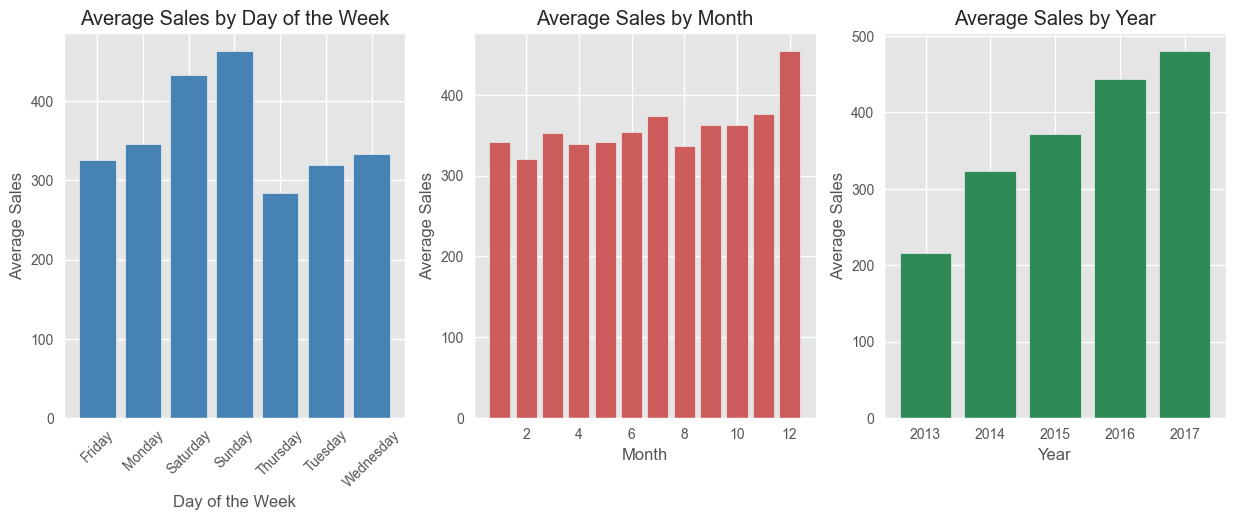

In [20]:
# Plot the results
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Sales by day of the week
axs[0].bar(sales_by_day.index, sales_by_day.values, color='steelblue')
axs[0].set_title('Average Sales by Day of the Week')
axs[0].set_xlabel('Day of the Week')
axs[0].set_xticklabels(sales_by_day.index, rotation=45)
axs[0].set_ylabel('Average Sales')

# Sales by month
axs[1].bar(sales_by_month.index, sales_by_month.values, color='indianred')
axs[1].set_title('Average Sales by Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Average Sales')

# Sales by year
axs[2].bar(sales_by_year.index, sales_by_year.values, color='seagreen')
axs[2].set_title('Average Sales by Year')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Average Sales')

plt.show()

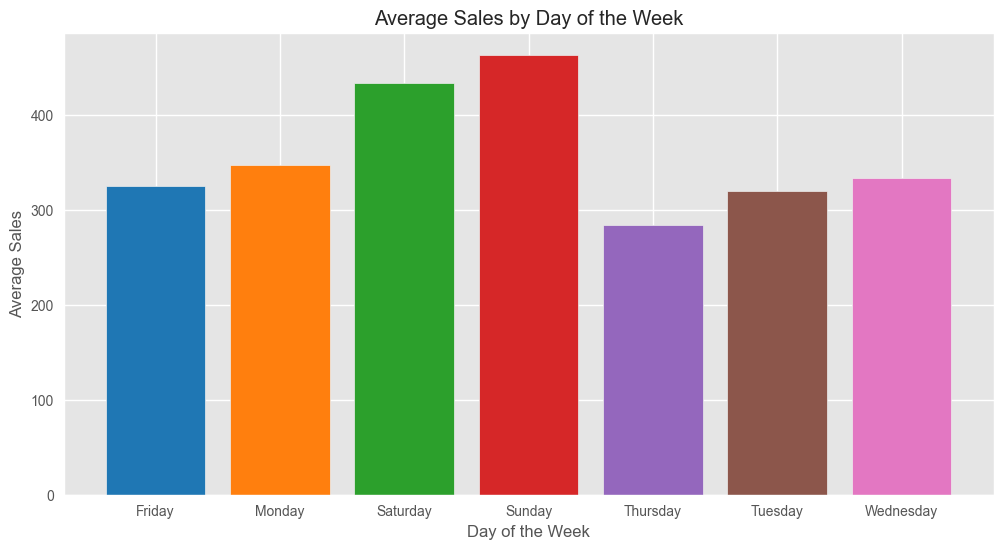

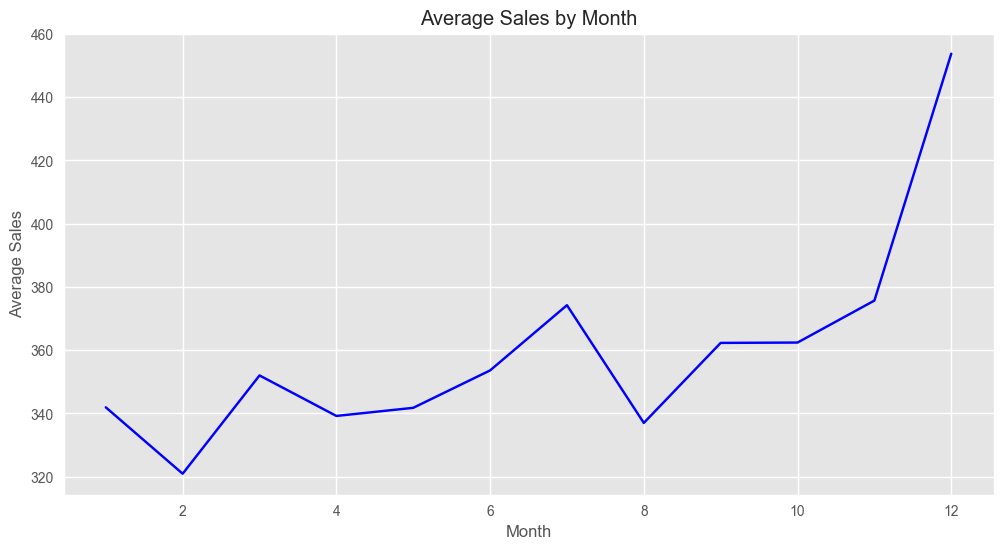

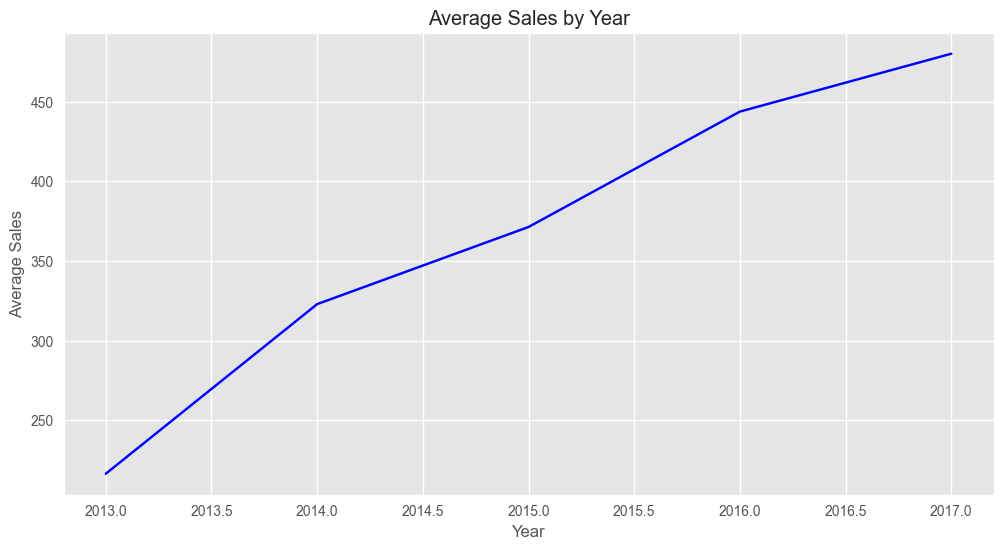

In [21]:
# Plot average sales by day of the week
fig, ax = plt.subplots()
ax.bar(sales_by_day.index, sales_by_day.values, color=cmap(range(len(sales_by_day))))
ax.set_title('Average Sales by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Sales')
plt.show()

# Plot average sales by month
fig, ax = plt.subplots()
ax.plot(sales_by_month.index, sales_by_month.values, color = 'blue')
ax.set_title('Average Sales by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Sales')
plt.show()

# Plot average sales by year
fig, ax = plt.subplots()
ax.plot(sales_by_year.index, sales_by_year.values, color='blue')
ax.set_title('Average Sales by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Sales')
plt.show()

The output above summarizes the average sales by day of the week, month, and year.

- For the day of the week, it shows the average sales for each day, where Sunday has the highest average sales and Thursday has the lowest.

- For the month, it shows the average sales for each month, where December has the highest average sales and February has the lowest.

- For the year, it shows the average sales for each year, where 2017 has the highest average sales and 2013 has the lowest.

In [22]:
train_data = train_transactions_oil_holidays_df
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 14 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   store_nbr     int64         
 2   family        object        
 3   sales         float64       
 4   onpromotion   int64         
 5   transactions  float64       
 6   dcoilwtico    float64       
 7   type          object        
 8   locale        object        
 9   locale_name   object        
 10  description   object        
 11  transferred   object        
 12  is_holiday    int64         
 13  is_promotion  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 349.5+ MB


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 14 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   store_nbr     int64         
 2   family        object        
 3   sales         float64       
 4   onpromotion   int64         
 5   transactions  float64       
 6   dcoilwtico    float64       
 7   type          object        
 8   locale        object        
 9   locale_name   object        
 10  description   object        
 11  transferred   object        
 12  is_holiday    int64         
 13  is_promotion  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 349.5+ MB


In [24]:
train_data.isnull().sum()

date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
transactions     249117
dcoilwtico       955152
type            2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
is_holiday            0
is_promotion          0
dtype: int64

In [25]:
train_data

,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico,type,locale,locale_name,description,transferred,is_holiday,is_promotion
0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,1,0
1,2013-01-01,1,BABY CARE,0.000,0,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,1,0
2,2013-01-01,1,BEAUTY,0.000,0,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,1,0
3,2013-01-01,1,BEVERAGES,0.000,0,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,1,0
4,2013-01-01,1,BOOKS,0.000,0,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,1,0
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,1,1
3054345,2017-08-15,9,PRODUCE,2419.729,148,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,1,0
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,1,0


In [26]:
from datetime import datetime

# convert the 'date' column to a datetime object
train_data['date'] = pd.to_datetime(train_data['date'])

# extract the day of the week as a new column
train_data['day_of_week'] = train_data['date'].apply(lambda x: x.strftime('%A'))

# print the dataframe
print(train_data)

              date  store_nbr                      family     sales  \
0       2013-01-01          1                  AUTOMOTIVE     0.000   
1       2013-01-01          1                   BABY CARE     0.000   
2       2013-01-01          1                      BEAUTY     0.000   
3       2013-01-01          1                   BEVERAGES     0.000   
4       2013-01-01          1                       BOOKS     0.000   
...            ...        ...                         ...       ...   
3054343 2017-08-15          9                     POULTRY   438.133   
3054344 2017-08-15          9              PREPARED FOODS   154.553   
3054345 2017-08-15          9                     PRODUCE  2419.729   
3054346 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3054347 2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  transactions  dcoilwtico     type    locale locale_name  \
0                  0           NaN         NaN  Holiday  National 

In [27]:
train_data

,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico,type,locale,locale_name,description,transferred,is_holiday,is_promotion,day_of_week
0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,1,0,Tuesday
1,2013-01-01,1,BABY CARE,0.000,0,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,1,0,Tuesday
2,2013-01-01,1,BEAUTY,0.000,0,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,1,0,Tuesday
3,2013-01-01,1,BEVERAGES,0.000,0,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,1,0,Tuesday
4,2013-01-01,1,BOOKS,0.000,0,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False,1,0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,1,0,Tuesday
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,1,1,Tuesday
3054345,2017-08-15,9,PRODUCE,2419.729,148,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,1,0,Tuesday
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,1,0,Tuesday


In [28]:
train_data['day_of_week'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [29]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Identify columns with missing values
missing_cols = train_data.columns[train_data.isnull().any()].tolist()

# Create a new dataframe to store the imputed data
impute_data = train_data.copy()

# Encode categorical variables using OrdinalEncoder
categorical_cols = impute_data.select_dtypes(include=['object']).columns.tolist()
encoder = OrdinalEncoder()
impute_data[categorical_cols] = encoder.fit_transform(impute_data[categorical_cols])

# Impute missing numerical values using IterativeImputer
imputer = IterativeImputer()
impute_data[missing_cols] = imputer.fit_transform(impute_data[missing_cols])

# Decode categorical variables back to their original values
impute_data[categorical_cols] = encoder.inverse_transform(impute_data[categorical_cols].round().astype(int))

# Save the imputed data to a new CSV file
impute_data.to_csv('imputed_data.csv', index=False)

In [30]:
sales_data = pd.read_csv(r'imputed_data.csv')
sales_data

,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico,type,locale,locale_name,description,transferred,is_holiday,is_promotion,day_of_week
0,2013-01-01,1,AUTOMOTIVE,0.000,0,1411.990598,49.559804,Holiday,National,Ecuador,Primer dia del ano,False,1,0,Tuesday
1,2013-01-01,1,BABY CARE,0.000,0,1411.990598,49.559804,Holiday,National,Ecuador,Primer dia del ano,False,1,0,Tuesday
2,2013-01-01,1,BEAUTY,0.000,0,1411.990598,49.559804,Holiday,National,Ecuador,Primer dia del ano,False,1,0,Tuesday
3,2013-01-01,1,BEVERAGES,0.000,0,1411.990598,49.559804,Holiday,National,Ecuador,Primer dia del ano,False,1,0,Tuesday
4,2013-01-01,1,BOOKS,0.000,0,1411.990598,49.559804,Holiday,National,Ecuador,Primer dia del ano,False,1,0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,2155.000000,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False,1,0,Tuesday
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,2155.000000,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False,1,1,Tuesday
3054345,2017-08-15,9,PRODUCE,2419.729,148,2155.000000,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False,1,0,Tuesday
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2155.000000,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False,1,0,Tuesday


In [31]:
sales_data.isna().sum()

date            0
store_nbr       0
family          0
sales           0
onpromotion     0
transactions    0
dcoilwtico      0
type            0
locale          0
locale_name     0
description     0
transferred     0
is_holiday      0
is_promotion    0
day_of_week     0
dtype: int64

In [32]:
sales_data.corr()

,store_nbr,sales,onpromotion,transactions,dcoilwtico,transferred,is_holiday,is_promotion
store_nbr,1.000000e+00,0.041273,0.007744,0.180693,-0.000240,4.128427e-16,-7.823647e-16,0.002139
sales,4.127337e-02,1.000000,0.428241,0.212549,-0.054694,-3.114104e-03,2.840255e-04,0.024943
onpromotion,7.744102e-03,0.428241,1.000000,0.025995,-0.129329,1.396814e-02,3.255880e-03,-0.032908
transactions,1.806927e-01,0.212549,0.025995,1.000000,0.020662,-3.181413e-02,-1.706319e-02,0.027685
dcoilwtico,-2.404072e-04,-0.054694,-0.129329,0.020662,1.000000,-3.875000e-02,-8.320873e-04,-0.107213
transferred,4.128427e-16,-0.003114,0.013968,-0.031814,-0.038750,1.000000e+00,2.161448e-01,0.004619
is_holiday,-7.823647e-16,0.000284,0.003256,-0.017063,-0.000832,2.161448e-01,1.000000e+00,0.000672
is_promotion,2.139189e-03,0.024943,-0.032908,0.027685,-0.107213,4.618881e-03,6.720927e-04,1.000000


In [33]:
sales_data.drop(['store_nbr', 'description', 'date', 'family'], axis=1, inplace= True)

In [34]:
ohe = OneHotEncoder()
ohe.fit(sales_data.select_dtypes(include=['object', 'bool']))
categorical_columns = sales_data.select_dtypes(include=['object', 'bool']).columns
X_ohe = pd.DataFrame(ohe.transform(sales_data.select_dtypes(include=['object', 'bool'])).toarray(),
                     columns=ohe.get_feature_names_out(categorical_columns))
X_ohe.index = sales_data.index

# Combine one-hot encoded features with numerical features
sales_1hot = pd.concat([sales_data.select_dtypes(include=['float64', 'int64']), X_ohe], axis=1)

In [35]:
sales_1hot.columns

Index(['sales', 'onpromotion', 'transactions', 'dcoilwtico', 'is_holiday',
       'is_promotion', 'type_Additional', 'type_Bridge', 'type_Event',
       'type_Holiday', 'type_Transfer', 'type_Work Day', 'locale_Local',
       'locale_National', 'locale_Regional', 'locale_name_Ambato',
       'locale_name_Cayambe', 'locale_name_Cotopaxi', 'locale_name_Cuenca',
       'locale_name_Ecuador', 'locale_name_El Carmen',
       'locale_name_Esmeraldas', 'locale_name_Guaranda',
       'locale_name_Guayaquil', 'locale_name_Ibarra', 'locale_name_Imbabura',
       'locale_name_Latacunga', 'locale_name_Libertad', 'locale_name_Loja',
       'locale_name_Machala', 'locale_name_Manta', 'locale_name_Puyo',
       'locale_name_Quevedo', 'locale_name_Quito', 'locale_name_Riobamba',
       'locale_name_Salinas', 'locale_name_Santa Elena',
       'locale_name_Santo Domingo',
       'locale_name_Santo Domingo de los Tsachilas', 'transferred_False',
       'transferred_True', 'day_of_week_Friday', 'day_of_we

In [36]:
# Split the dataset into training and testing sets
train, test = train_test_split(sales_1hot, test_size=0.3, random_state=42)

In [37]:
train.shape, test.shape

((2138043, 48), (916305, 48))

In [38]:
train_target = train['sales'].copy()

train = train.drop(columns='sales', axis= 1)

train_target.head()

650070     2860.0
182874        7.0
1253290      13.0
228346        0.0
2292001       4.0
Name: sales, dtype: float64

In [39]:
train.head()

,onpromotion,transactions,dcoilwtico,is_holiday,is_promotion,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,...,locale_name_Santo Domingo de los Tsachilas,transferred_False,transferred_True,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
650070,0,2984.0,99.940000,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
182874,0,1746.0,67.743461,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1253290,0,2160.0,67.957616,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
228346,0,879.0,96.090000,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2292001,0,987.0,49.340000,1,0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Scalling

In [40]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the training data
train_scaled = scaler.fit_transform(train)

# Scale the testing data using the same scaler
#test_scaled = scaler.transform(test)

## Model Training

### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model instance
lin_reg = LinearRegression()

# Fit the model on the scaled training data and target
lin_reg.fit(train_scaled, train_target)

LinearRegression()

In [42]:
# Predict the target variable for the scaled test data
train_pred = lin_reg.predict(train_scaled)
print(train_pred)

[474.60190891 295.279155   324.28159641 ... 157.03318332 866.48826145
 233.26633762]


In [43]:
print(train_target)

650070     2860.0
182874        7.0
1253290      13.0
228346        0.0
2292001       4.0
            ...  
1692743     222.0
2356330       0.0
2229084       3.0
2768307    1845.0
2219110     112.0
Name: sales, Length: 2138043, dtype: float64


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

lin_mse = mean_squared_error(train_target, train_pred)

lin_rmse = np.sqrt(lin_mse)

lin_mae = mean_absolute_error(train_target, train_pred)

print(f"MAE: {lin_mae}")
print(f"RMSE: {lin_rmse}")
print(f"MSE: {lin_mse}")

MAE: 424.1465551132832
RMSE: 976.9269223226959
MSE: 954386.2115588947


### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_scaled,train_target)

DecisionTreeRegressor()

In [46]:
tree_pred = tree_reg.predict(train_scaled)
tree_mae = mean_absolute_error(train_target, tree_pred)
tree_mse = mean_squared_error(train_target, tree_pred)
tree_rmse = np.sqrt(tree_mse)

print(f"MAE: {tree_mae}")
print(f"RMSE: {tree_rmse}")
print(f"MSE: {tree_mse}")

MAE: 219.28446718624951
RMSE: 595.3370602117786
MSE: 354426.21526160295


### XGBoost

In [48]:
import xgboost as xgb

params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'n_estimators': 1000,
    'eval_metric': 'rmse'
}

xgb_model = xgb.XGBRegressor(**params)
xgb_model.fit(train_scaled, train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [49]:
xgb_pred = xgb_model.predict(train_scaled)
xgb_mae = mean_absolute_error(train_target, xgb_pred)
xgb_mse = mean_squared_error(train_target, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"MAE: {xgb_mae}")
print(f"RMSE: {xgb_rmse}")
print(f"MSE: {xgb_mse}")

MAE: 346.5152054962067
RMSE: 815.2410225853671
MSE: 664617.924906035


In [50]:
from xgbtune import tune_xgb_model

params = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001],
            'n_estimators': [50, 100, 150]}


params, round_count = tune_xgb_model(params, train_scaled, train_target)

tuning pass 0...
computing best round...


XGBoostError: Invalid Parameter format for learning_rate expect float but value='[0.1, 0.01, 0.001]'

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define the range of hyperparameters to search over
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Initialize the decision tree regressor model
tree_reg = DecisionTreeRegressor()

# Perform a grid search over the hyperparameters
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_scaled, train_target)

# Print the best hyperparameters found by the grid search
print("Best parameters: ", grid_search.best_params_)

In [ ]:
# Evaluate the performance of the best model on the training data
tree_pred = grid_search.predict(train_scaled)
tree_mae = mean_absolute_error(train_target, tree_pred)
tree_mse = mean_squared_error(train_target, tree_pred)
tree_rmse = np.sqrt(tree_mse)

print(f"MAE: {tree_mae}")
print(f"RMSE: {tree_rmse}")
print(f"MSE: {tree_mse}")

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'n_estimators': [500, 1000, 1500]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(train_scaled, train_target)

print(grid_search.best_params_)
print(grid_search.best_score_)